##  Cradiovascular Decompensation Forecasting

Importing Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Uploading Dataset

In [113]:
from google.colab import files
uploaded = files.upload()

Saving Cardio_Patients_Final.csv to Cardio_Patients_Final (2).csv


In [115]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Cardio_Patients_Final (2).csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
print("The size of the data is: " ,df2.shape)

The size of the data is:  (2003, 12)


### About the Dataset
The dataset comprises a range of attributes that are clinically relevant in the diagnosis and analysis of heart failure detection. The dataset provides inclusive information about various attributes related to patients health and potential indicators of heart disease.
The dataset used in this analysis was retrieved from Kaggle. Kaggle is a web platform that hosts the world's largest Data Science community.



In [116]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160.0,180,0,normal,156,NO,1,Flat,1
2,37,Mr,ATA,130.0,283,0,ST,98,NO,0,Up,0
3,48,Mrs,ASY,138.0,214,0,Normal,108,Yes,1.5,Flat,1
4,54,M,NAP,150.0,195,0,normallll,122,N,0,Up,0


In [117]:
df2.describe()

,Age,RestingBP
count,2003.000000,1995.000000
mean,53.745881,132.004010
std,10.166586,17.928169
min,2.000000,0.000000
25%,47.000000,120.000000
50%,55.000000,130.000000
75%,61.000000,140.000000
max,94.000000,200.000000


# Data Cleaning and Preprocessing





###Checking it there are any null values in the dataframe.

In [119]:
df2.isnull().sum()

Age                0
Sex                4
ChestPainType      0
RestingBP          8
Cholesterol        2
FastingBS          0
RestingECG         0
MaxHR              3
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease      18
dtype: int64

On Analysis we found , that the data has some null values in columns : Sex , RestingBP , Cholerstrol , MaxHR , Heart Disease.

In [ ]:
# Checking the data types of each column
print(df2.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol        object
FastingBS          object
RestingECG         object
MaxHR              object
ExerciseAngina     object
Oldpeak            object
ST_Slope           object
HeartDisease       object
dtype: object


In [ ]:
# Check unique values in each column
print(df2.nunique())

Age                67
Sex                11
ChestPainType       5
RestingBP          68
Cholesterol       229
FastingBS          10
RestingECG         15
MaxHR             120
ExerciseAngina      8
Oldpeak            54
ST_Slope            8
HeartDisease        4
dtype: int64


In [120]:
# Drop rows where "HeartDisease" is null
df = df2.dropna(subset=["HeartDisease"])


In [121]:
df['HeartDisease'].isna().sum()

0

Records with no Traget variable  will not help us train our model . Further it will distort calculations, resulting in inaccurate conclusions.
Therefore all the null values are removed from the column - HeartDisease.

In [122]:
df['HeartDisease'].unique()

array(['0', '1', '.', '...'], dtype=object)

In [123]:
# Delete all rows with column 'Heart Disease ' has unecessary value
h_d = df[(df['HeartDisease'] == '...')].index
df.drop(h_d , inplace=True)
# # Delete all rows with column 'Heart Disease ' has unecessary value
h1_d = df[ (df['HeartDisease'] == '.')].index
df.drop(h1_d , inplace=True)


In [124]:
df['HeartDisease'].unique()

array(['0', '1'], dtype=object)

In [125]:
df.isnull().sum()

Age               0
Sex               4
ChestPainType     0
RestingBP         8
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             3
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

However we , still see that some of the other columns  have null values.

In [126]:
# Check for outliers
df.describe()

,Age,RestingBP
count,1983.000000,1975.000000
mean,53.635401,131.938734
std,9.858315,17.944578
min,2.000000,0.000000
25%,47.000000,120.000000
50%,55.000000,130.000000
75%,60.000000,140.000000
max,77.000000,200.000000


Analysing & Removing Outliers

<Axes: xlabel='Age'>

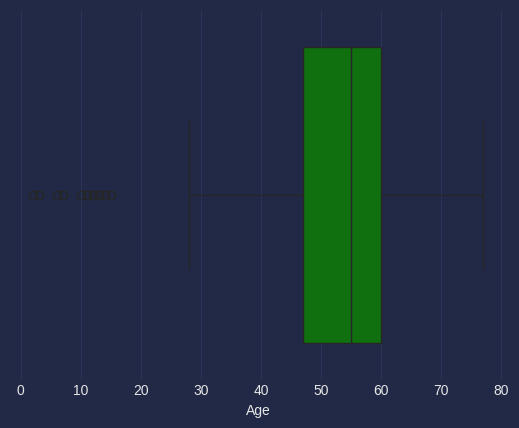

In [127]:
import seaborn as sns
sns.boxplot(x=df["Age"] , color='green')

Based on the above graph we can see that the age of the Patients is generally centered around 25+ to 75+ . However there are some enteries with Age lesser than 20 . These enteries are outliers because they data deviates significantly from the rest of the data.

In [129]:
#dropping records where Age is less than 20 (Removing Outliers)
df= df.drop(df[df['Age'] < 20].index)

In [130]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160.0,180,0,normal,156,NO,1,Flat,1
2,37,Mr,ATA,130.0,283,0,ST,98,NO,0,Up,0
3,48,Mrs,ASY,138.0,214,0,Normal,108,Yes,1.5,Flat,1
4,54,M,NAP,150.0,195,0,normallll,122,N,0,Up,0


Analysis of Column : Sex (M/F)

In [131]:

df['Sex'].unique()

array(['M', 'F', 'Mr', 'Mrs', 'Fem', 'female', 'feml', nan], dtype=object)

Acc to the observation, we find that the Column consisting gender of the patients have some discripency.

Renaming the data

In [132]:
# Renaming
df.loc[df['Sex'] == 'Mr', 'Sex'] = 'M'
df.loc[df['Sex'] == 'M ' , 'Sex'] = 'M'
df.loc[df['Sex'] == 'Mrs', 'Sex'] = 'F'
df.loc[df['Sex'] == 'Fem', 'Sex'] = 'F'
df.loc[df['Sex'] == 'female', 'Sex'] = 'F'
df.loc[df['Sex'] == 'feml', 'Sex'] = 'F'
df.loc[df['Sex'] == 'feml', 'Sex'] = 'F'

In [133]:
df['Sex'].unique()

array(['M', 'F', nan], dtype=object)

In [134]:
 # Drop rows where "Sex" is null
df = df.dropna(subset=["Sex"])

In [135]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

<Axes: xlabel='Sex'>

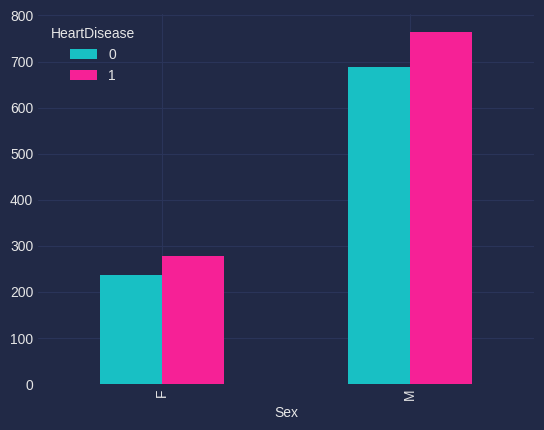

In [137]:
# Heart Disease Prevalence by Sex

df.groupby('Sex')['HeartDisease'].value_counts().unstack().plot(kind='bar' )


Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.

# ChestPain

In [138]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA', 'NAPPP'], dtype=object)

In [139]:
count_by_value = df.groupby(df['ChestPainType'])
count_by_value.size()

ChestPainType
ASY      578
ATA      352
NAP      492
NAPPP      1
TA       544
dtype: int64

In [140]:
#Renaming
df.loc[df['ChestPainType'] == 'NAPPP' , 'ChestPainType'] = 'NAP'

In [141]:
#Checking the unique values in Chest Pain Type after Renaming Column
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [142]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160.0,180,0,normal,156,NO,1,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,NO,0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Yes,1.5,Flat,1
4,54,M,NAP,150.0,195,0,normallll,122,N,0,Up,0


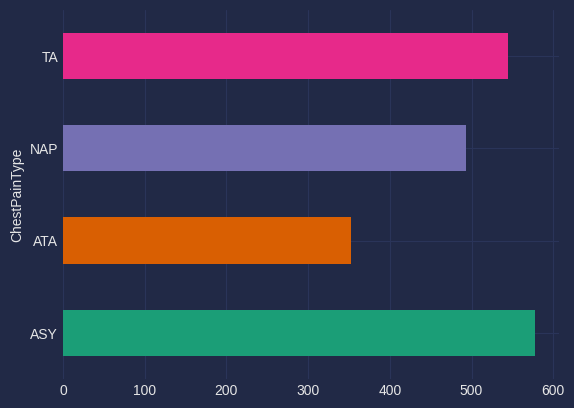

In [143]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ChestPainType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

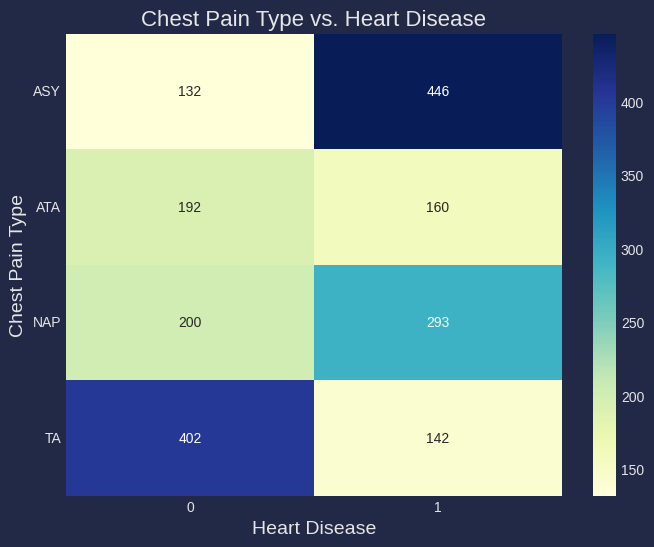

In [144]:
# Compare the chest pain type and heart disease
ct_table = pd.crosstab(df['ChestPainType'], df['HeartDisease'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ct_table, annot=True, cmap="YlGnBu", fmt="g")

# Add title and labels
plt.title('Chest Pain Type vs. Heart Disease', fontsize=16)
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Chest Pain Type', fontsize=14)

# Rotate tick labels
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()

## Checking to see if there are any duplicate rows

In [168]:
# Check for duplicate rows
df.duplicated().sum()


0

In [169]:
# Drop duplicate rows
df = df.drop_duplicates()

#Analysing Column ExerciseAngina

In [170]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [171]:
#Renaming the values in Column ExerciseAngina to make them uniform
df.loc[df['ExerciseAngina'] == 'NO', 'ExerciseAngina'] = 'N'
df.loc[df['ExerciseAngina'] == 'no', 'ExerciseAngina'] = 'N'
df.loc[df['ExerciseAngina'] == 'Never', 'ExerciseAngina'] = 'N'
df.loc[df['ExerciseAngina'] == 'Yes', 'ExerciseAngina'] = 'Y'
df.loc[df['ExerciseAngina'] == 'ye', 'ExerciseAngina'] = 'Y'


In [172]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [173]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160.0,180,0,normal,156,N,1,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,normallll,122,N,0,Up,0


## RestingBP

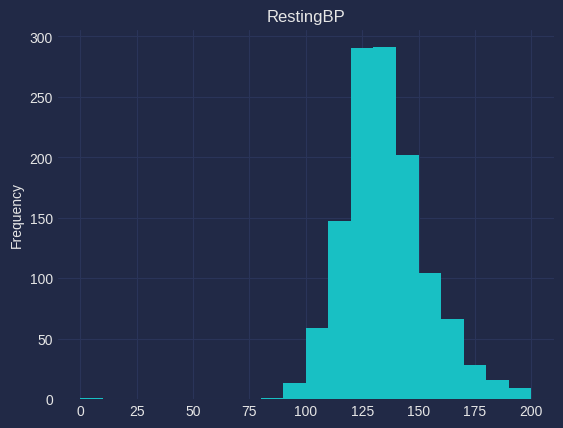

In [174]:
from matplotlib import pyplot as plt
df['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [175]:
df['RestingBP'].describe()

count    1227.000000
mean      132.200491
std        18.234244
min         0.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: RestingBP, dtype: float64

In [176]:
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0.0,0,0,Normal,155,N,1.5,Flat,1


In [177]:
df['RestingBP'].isnull().sum()

0

In [178]:
# impute 0 values with mean Resting BP
mean_resting_bp = df['RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].fillna(mean_resting_bp)

In [179]:
df['RestingBP'].isnull().sum()

0

In [180]:
df['FastingBS'].unique()

array(['0', '1'], dtype=object)

In [181]:
df['FastingBS'].describe()

count     1227
unique       2
top          0
freq       967
Name: FastingBS, dtype: object

In [182]:
df['Cholesterol'].isnull().sum()

0

In [183]:
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


##Resting ECG

In [184]:
df['RestingECG'].unique()

array(['Normal', 'normal', 'ST', 'normallll', 'aroundnormal', 'LVH',
       'normalll'], dtype=object)

In [185]:
df.loc[df['RestingECG'] == 'normal', 'RestingECG'] = 'Normal'
df.loc[df['RestingECG'] == 'normallll', 'RestingECG'] = 'Normal'
df.loc[df['RestingECG'] == 'normalll', 'RestingECG'] = 'Normal'
df.loc[df['RestingECG'] == 'aroundnormal', 'RestingECG'] = 'Normal'
df.loc[df['RestingECG'] == 'lvh', 'RestingECG'] = 'LVH'
df.loc[df['RestingECG'] == 'Never', 'RestingECG'] = 'LVH'

In [186]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [187]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [188]:
df.loc[df['ST_Slope'] == 'UUp', 'ST_Slope'] = 'Up'
df.loc[df['ST_Slope'] == 'uppp', 'ST_Slope'] = 'Up'
df.loc[df['ST_Slope'] == 'fllat', 'ST_Slope'] = 'Flat'
df.loc[df['ST_Slope'] == 'dowm', 'ST_Slope'] = 'Down'

In [189]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

## Analysing MaxHR Column

In [190]:
#
df['MaxHR'].isna().sum()

0

In [191]:
df = df.dropna(subset=["MaxHR"])

In [192]:
df['MaxHR'].isna().sum()

0

In [193]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0,Up,0


# EXPLORATORY DATA ANALYSIS

#  FastingBS vs RestingECG



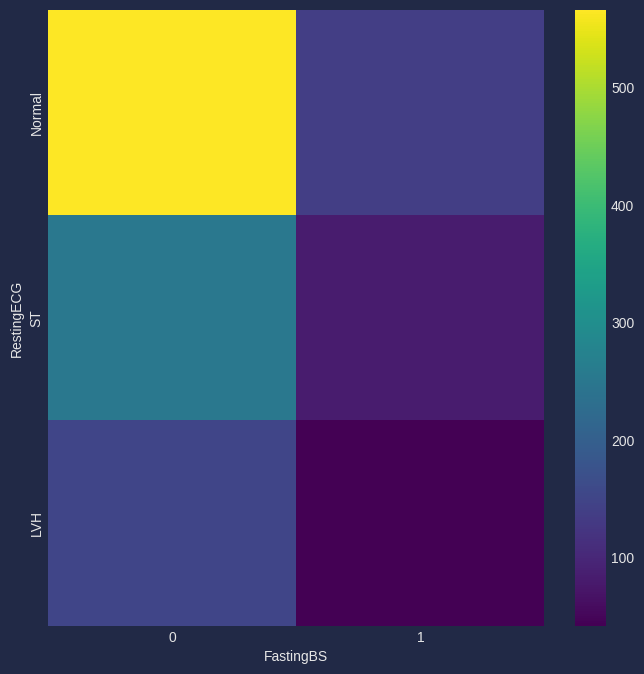

In [194]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RestingECG'].value_counts()
    for x_label, grp in df.groupby('FastingBS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FastingBS')
_ = plt.ylabel('RestingECG')

# Exploratory Data Analysis

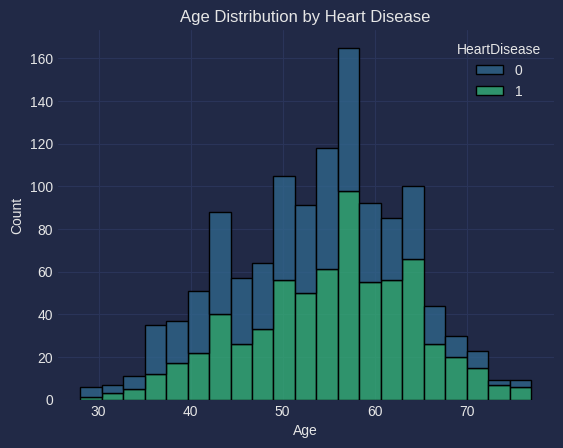

In [196]:
# Age Distribution by Heart Disease

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='Age', hue='HeartDisease', multiple='stack', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')
_ = plt.title('Age Distribution by Heart Disease')

In [197]:
df['ChestPainType'].value_counts()

ASY    520
NAP    291
ATA    227
TA     189
Name: ChestPainType, dtype: int64

In [198]:
df['new_Col'] = pd.to_numeric(df['HeartDisease'])

In [199]:
df[df['new_Col']==1]['ChestPainType'].value_counts()

ASY    408
NAP    142
ATA     66
TA      59
Name: ChestPainType, dtype: int64

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [201]:
fig = px.pie(df,
             values='HeartDisease',
             names='ChestPainType',
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title='The Impact of Chest Pain Type on Disease Severity')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title={'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'})

In [202]:
df['MaxHR'] = pd.to_numeric(df['MaxHR'])

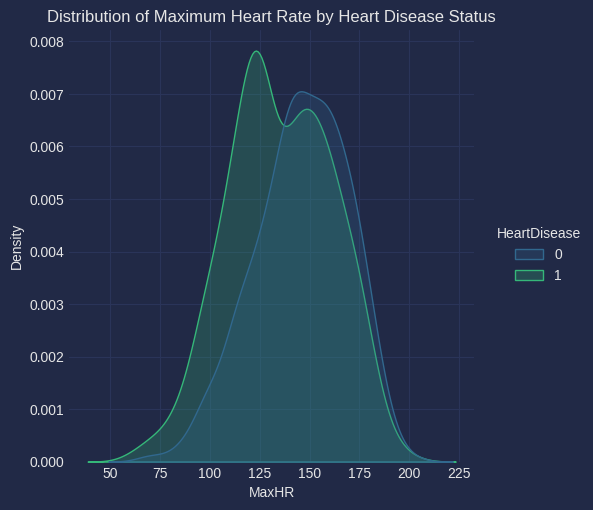

In [203]:
sns.displot(data=df, x='MaxHR', hue='HeartDisease', palette='viridis', kind='kde', fill=True)
plt.title('Distribution of Maximum Heart Rate by Heart Disease Status')
plt.show()


In [205]:
#The average effect of RestingECG on both sexes in relation to the disease
df.pivot_table(index='Sex',columns='RestingECG',values='new_Col',aggfunc='mean').style.background_gradient(cmap='Reds')

RestingECG,LVH,Normal,ST
Sex,,,
F,0.300000,0.365854,0.600000
M,0.647887,0.547310,0.654762


In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.


# CREATING CORRELATION MATRIX

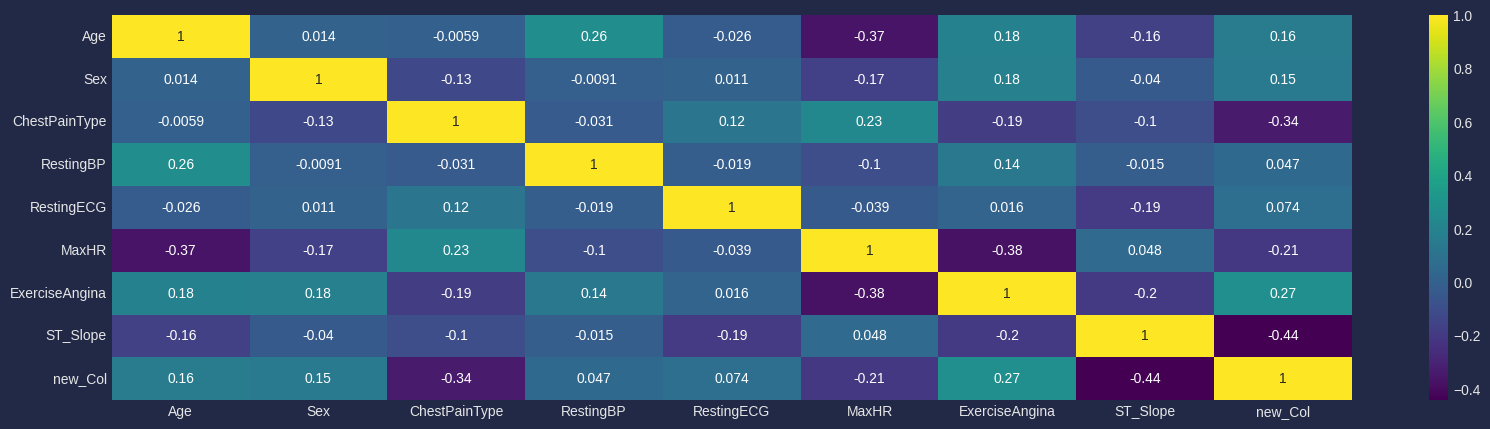

In [208]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = "viridis",annot = True);

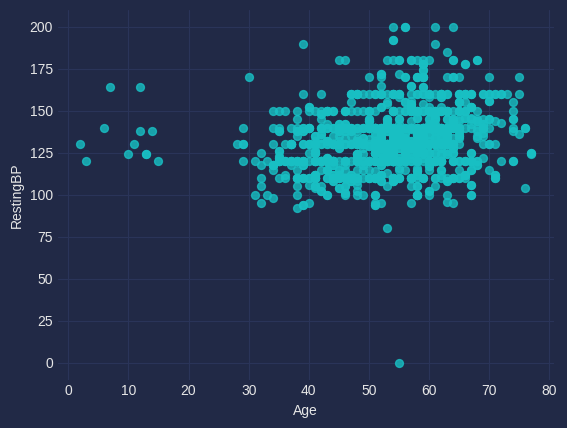

In [102]:
# @title Age vs RestingBP

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

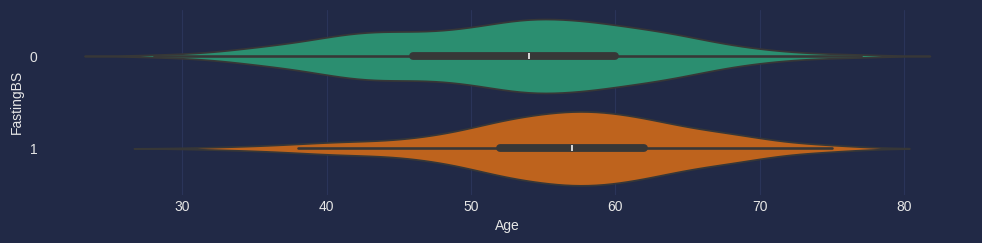

In [159]:
#FastingBS vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['FastingBS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='FastingBS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0.5, 1.0, 'MaxHR vs RestingECG')

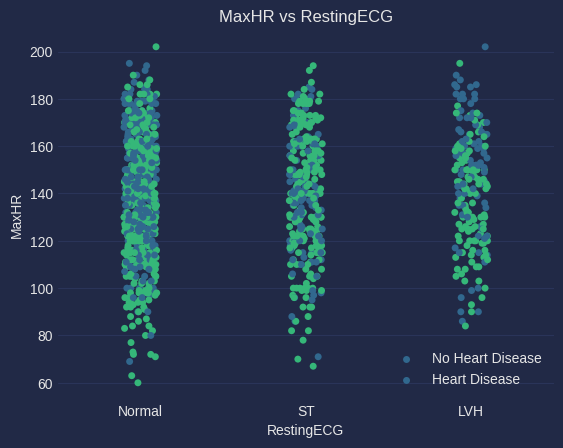

In [111]:
sns.stripplot(x = 'RestingECG',y = "MaxHR",data = df,hue = 'HeartDisease',palette = "viridis")
plt.legend(['No Heart Disease', 'Heart Disease'])

plt.title("MaxHR vs RestingECG")